# Sampling cost
The total cost for time evolution goes like $2 t  + \mathcal{O}(\log (1/\epsilon_{TE}))$, so to leading order in $t$ we need to multiply the qubitization costs by

$$
\mathrm{Cost} = \sum_i^{N_T} t_i = \Delta t N_t \times (N_t + 1) / 2
$$
assuming a regularly spaced grid of points, $\Delta t = t_\mathrm{max} / (N_t+1)$, so 
$$
\mathrm{Cost} = t_\mathrm{max} N_t / 2 
$$

We've seen before that if we allow $t_\mathrm{max}$ to vary, then the error in the slope, $\epsilon \sim \mathcal{O}(\sigma_{T}/t_\mathrm{max})$, for fixed $N_t$, and similarly, if we fix $T_{max}$ and vary $N_t$ we expect $\epsilon \sim \mathcal{O}(\sigma_{T}/N_{t}^{1/2})$, i.e., more similar to the reduction we might expect from just sampling. Thus we can obtain a cost complexity by writing $N_t = c_{N_t} \sigma_T^2/\epsilon^2$, and similarly for fixed $N_t$, $t_{\mathrm{max}} = c_{t_\mathrm{max}} \sigma_{T}/\epsilon$, where the costants are to be determined. Thus

$$
\mathrm{Cost} =  c_{N_t} \frac{t_{\mathrm{max}} \sigma_T^2}{2\epsilon^2}
$$
or
$$
\mathrm{Cost} = c_{t_\mathrm{max}} \frac{N_t \sigma_{T}}{2\epsilon}
$$

both constants come out to 0.037.

In [2]:
0.037 * 20 * 4 / (2*0.01)

148.0

In [3]:
0.037 * 20 * 16 / (2*0.01**2.0)

59200.0

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

# Look at some artificial data first
sigma = 4
v_proj = 2.0
mass_proj = 1836
max_distance = 170
tmax = max_distance / v_proj 
ke_0 = 0.5 * mass_proj * v_proj**2.0
stopping = 0.6
print(f"Tmax: {tmax}")

def linear(x, a, b):
    return a*x + b

def fit_linear(x, y):
    try:
        popt, pcov = scipy.optimize.curve_fit(linear, x, y)
        return popt, pcov
    except np.linalg.LinAlgError:
        return None

Tmax: 85.0


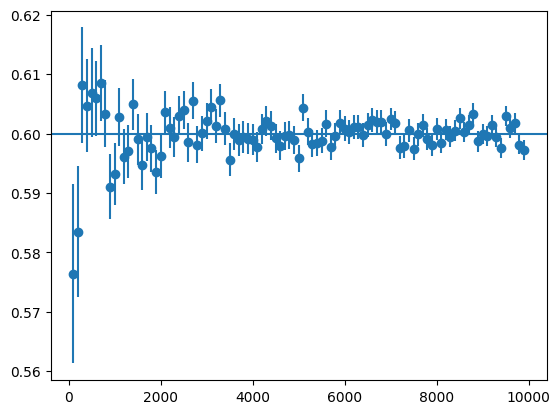

In [5]:

res = []
cost = []
factor = []
num_pts = np.array(range(100, 10_000, 100))
for density in num_pts:
    xs = np.linspace(0, tmax, density)
    factor.append((tmax / density))
    cost.append(np.sum(xs))
    ys = linear(xs, stopping, ke_0) + np.random.normal(0.0, sigma, density)
    popt, pcov = fit_linear(xs, ys)
    res.append((popt[0], np.sqrt(pcov[0,0])))

slopes, err = zip(*res)
plt.errorbar(num_pts, slopes, yerr=err, fmt="o")
plt.axhline(stopping)

In [6]:
xs, ys = np.log(num_pts), np.log(err)
trend, trend_err = fit_linear(xs, ys)
print(f"epsilon = N^({trend[0]:.2f})")
print(f"cNt = {np.exp(trend[0])/sigma**2.0}")

epsilon = N^(-0.50)
cNt = 0.03808374537866027


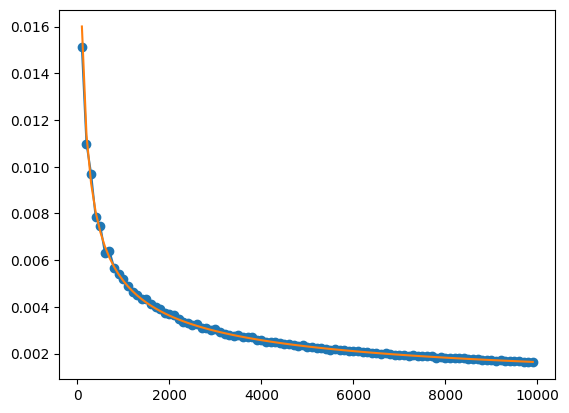

In [7]:
plt.plot(num_pts, err, marker="o")
_x = num_pts 
plt.plot(_x, np.exp(trend[1])*_x**trend[0])

0.0 10.0 1.0912036212750045 0.3395859344768419
0.0 11.919191919191919 0.37363567044866386 0.2824859424161451
0.0 13.838383838383837 0.815555806814416 0.2354015229974006
0.0 15.757575757575758 0.7008570123738568 0.18496971871305742
0.0 17.676767676767675 0.40944860374718317 0.21270878537206916
0.0 19.595959595959595 0.7448189466505362 0.1847308549035946
0.0 21.515151515151516 0.7056603323203654 0.14243395121938093
0.0 23.434343434343432 0.6007384253572993 0.13893581458822865
0.0 25.353535353535353 0.7092840770393446 0.14332619332759433
0.0 27.272727272727273 0.8157674231035907 0.11608729484309106
0.0 29.19191919191919 0.4691446179652722 0.131479446012789
0.0 31.11111111111111 0.5102353890575791 0.1082987700802646
0.0 33.03030303030303 0.5703992474806552 0.09831702839903009
0.0 34.94949494949495 0.6503875341073188 0.10001489562846973
0.0 36.868686868686865 0.6649406413163697 0.09577686851909768
0.0 38.78787878787878 0.5711588381416148 0.08902306241944295
0.0 40.707070707070706 0.51218419

(-0.5, 1.5)

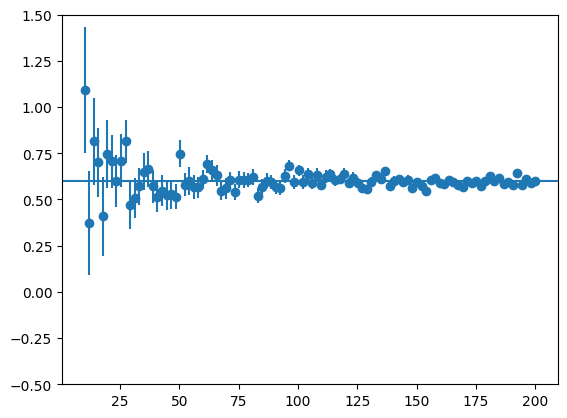

In [8]:
res = []
cost = []
factor = []
num_pts = 100
sigma = 10.0
tmax = 200
tmaxs = np.linspace(10, tmax, 100)
for _tmax in tmaxs:
    xs = np.linspace(0, _tmax, num_pts+1)
    factor.append((tmax / density))
    cost.append(np.sum(xs))
    ys = linear(xs, stopping, ke_0) + np.random.normal(0.0, sigma, num_pts+1)
    popt, pcov = fit_linear(xs, ys)
    print(xs[0], xs[-1], popt[0], np.sqrt(pcov[0,0]))
    res.append((popt[0], np.sqrt(pcov[0,0])))

slopes, err = zip(*res)
plt.errorbar(tmaxs, slopes, yerr=err, fmt="o")
plt.axhline(stopping)
plt.ylim([-0.5, 1.5])

In [9]:
xs, ys = np.log(tmaxs), np.log(err)
trend, trend_err = fit_linear(xs, ys)
print(trend, trend_err)
print(f"epsilon = N^({trend[0]:.2f})")
print(f"cNt = {np.exp(trend[0])/sigma}")

[-0.98836275  1.18137614] [[ 0.0001014  -0.00045116]
 [-0.00045116  0.00206057]]
epsilon = N^(-0.99)
cNt = 0.03721855547033703


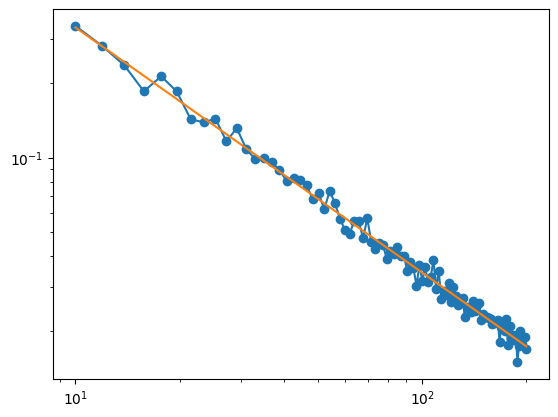

In [10]:
plt.yscale("log")
plt.xscale("log")
plt.plot(tmaxs, np.array(err), marker="o")
_x = tmaxs
plt.plot(_x, np.exp(trend[1])*_x**trend[0])

1 9 1.40494139292633 0.5113287127257532 4.0
1 11 -0.04313098040816499 0.6167768371823488 4.0
1 13 0.9411762205718678 0.6216089380924971 4.0
1 15 0.8401025196332308 0.2669862326964946 4.0
1 17 0.43468738194656 0.1931428786643027 4.0
1 19 0.47812099418830206 0.20656170887988587 4.0
1 21 0.5631974302779139 0.15165786304700685 4.0
1 23 0.45126315936897704 0.15324300156750312 4.0
1 25 0.7603539288562383 0.17236133261721304 4.0
1 27 0.7253239927818739 0.0846537015659406 4.0
1 29 0.8216499241822027 0.07171289968435177 4.0
1 31 0.5402674914800712 0.10400377991224712 4.0
1 33 0.5148276750872398 0.09736402937143283 4.0
1 35 0.61836761531892 0.12579301183260685 4.0
1 37 0.5274137999112009 0.07896895158416573 4.0
1 39 0.5959926930156964 0.0874878394720424 4.0
1 41 0.6101319871807671 0.08604673475288965 4.0
1 43 0.5784318523398883 0.05941083355094709 4.0
1 45 0.6558062701102814 0.07008769478297874 4.0
1 47 0.6530948971492176 0.059816338568759876 4.0
1 49 0.6688313361072271 0.048157881181559475 4.0


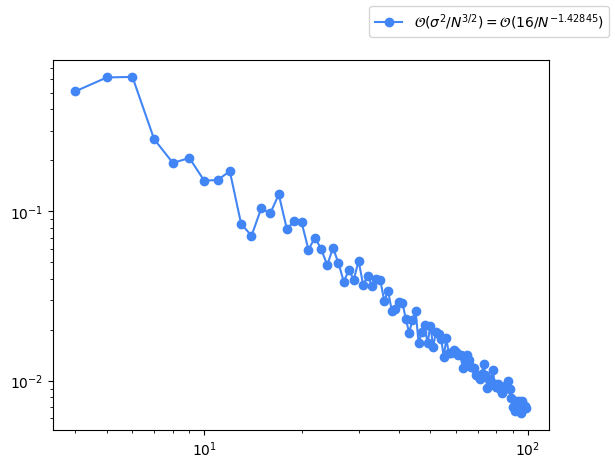

In [11]:
s = stopping 
t = ke_0
n = 20
dx = 2
x1 = 3
sigmasquared = 10

x_i = lambda i: (x1 + (i - 1) * dx)
x = np.array([x_i(ii) for ii in range(1, n+1)])
y = s * x + t

fig, ax = plt.subplots(nrows=1, ncols=1)

num_trials = 1
colors = ['#4285F4', '#EA4335', '#FBBC04', '#34A853']

# for idx, sigmasquared in enumerate([5, 10, 15, 20]):
for idx, sigmasquared in enumerate([16]):
    average_slopes = []
    average_slopes_error = []
    n_vals = []
    for nn in range(4, 100):
        #nn = 2**n
        n_vals.append(int(nn))
        slopes = []
        intercepts = []
        for _ in range(num_trials):
            x_i = lambda i: (x1 + (i - 1) * dx)
            x = np.array([x_i(ii) for ii in range(0, int(nn)+1)])
            y = s * x + t
            y_noise = y + np.random.normal(0, scale=np.sqrt(sigmasquared), size=int(nn)+1)
        popt, pcov = fit_linear(x, y_noise)
        slopes.append(popt[0])
        intercepts.append(popt[1])
        print(x[0], x[-1], popt[0], np.sqrt(pcov[0,0]), np.sqrt(sigmasquared))

        average_slopes.append(slopes)
        average_slopes_error.append(np.sqrt(pcov[0,0]))

    #print(average_slopes_error)
    popt, pcov = fit_linear(np.log(n_vals), np.log(average_slopes_error))
    print(popt)
    slopescaling = np.around(popt[0], 5)
    ax.loglog(n_vals, average_slopes_error, 'o-', label=fr'$\mathcal{{O}}(\sigma^{2}/N^{{3/2}}) = \mathcal{{O}}({{{sigmasquared}}}/N^{{{slopescaling}}})$',
                color=colors[idx])

fig.legend()

# Actual stopping Data

* Cost vs error in stopping for different velocities
* Look at single velocity first

In [12]:
# Let's read in the Carbon example provided by Sandia
import numpy as np
from mec_sandia.vasp_utils import read_vasp
import matplotlib.pyplot as plt
import scipy.optimize

ase_cell = read_vasp(f"../vasp_data/C_POSCAR")
# Next we can get some system paramters
volume_ang = ase_cell.get_volume()
print("Volume = {} A^3".format(volume_ang))

# To compute rs parameter we need volume in Bohr
from ase.units import Bohr

volume_bohr = volume_ang / Bohr**3
# and the number of valence electrons
num_carbon = len(np.where(ase_cell.get_atomic_numbers() == 6)[0])
# There is 1 hydrogen atom in the cell
num_elec = 1 + num_carbon * 4
from mec_sandia.vasp_utils import compute_wigner_seitz_radius

# Get the Wigner-Seitz radius
rs = compute_wigner_seitz_radius(volume_bohr, num_elec)
print("rs = {} bohr".format(rs))
sim_res = []
act_res = []
qData2 = np.loadtxt("AndrewsFirstGaussian/C_10gpcc_1eV_stopping_config1.txt")
velocity_au = qData2[:, 0]  # the velocities are already given in atomic units

from mec_sandia.stopping_power import (
    parse_stopping_data,
    compute_stopping_power,
    _fit_linear,
)
from ase.units import Bohr, Hartree

stopping_err = 0.1  # eV/A
stopping_err_au = stopping_err * Bohr / Hartree
sigma_k = 4
# Get DFT data
qData1 = np.loadtxt("AndrewsFirstGaussian/4.0_work_vs_dist")
position_au = qData1[:, 0] / (
    0.529
)  # divide the positions (angstroms) by the number of angstroms per atomic unit
time_au = (
    position_au / 4.0
)  # divide the positions in atomic units by the velocity in atomic units to get the time in atomic units
work_au = (
    qData1[:, 1] / 27.2
)  # divide the work in eV by the number of eV per atomic unit of energy

# load the full stopping curve
qData2 = np.loadtxt("AndrewsFirstGaussian/C_10gpcc_1eV_stopping_config1.txt")
velocity_au = qData2[:, 0]  # the velocities are already given in atomic units
stopping_au = qData2[:, 1] * (
    0.529 / 27.2
)  # the stopping powers are given in eV/A, so we multiply by the number of A/bohr and divide by the number of eV/Ha
# plt.plot(velocity_au, stopping_au, marker="o", lw=0)
from scipy.interpolate import CubicSpline

stopping_spl = CubicSpline(velocity_au, stopping_au)
xs = np.linspace(velocity_au[0], velocity_au[-1], 100)
stopping_deriv_spl = stopping_spl.derivative(1)

mass_proj = 1838
ecut_ha = 2000 / Hartree
sigma_k = 4.0
box_length = volume_bohr ** (1.0 / 3.0)
print("box_length = {} bohr".format(box_length))
vel = 2.0


Volume = 255.27133939199965 A^3
rs = 0.9289611708818379 bohr
box_length = 11.987617756468008 bohr


* Look at cost decrease as max_time is reduced (i.e. the distance is reduce) for a fixed number of points.

In [13]:
vel = 2.0
dft_data = parse_stopping_data(
    f"AndrewsFirstGaussian/{vel}_work_vs_dist",
    vel,
    mass_proj=mass_proj,
    num_points=20,
    rare_event=0.25,
    random_sub_sample=False,
)
max_time = dft_data.times[-1]
print(dft_data.distance[-1])
print(dft_data.distance_sub_sample[-1])
print(f"cost = {sum(dft_data.time_sub_sample)}")


151.6254785420197
148.70466877853335
cost = 898.2519984843008


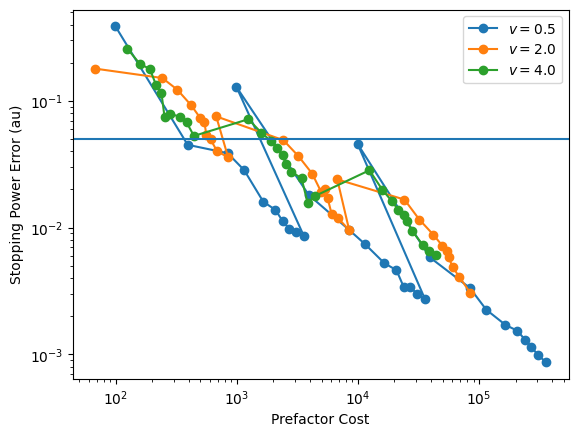

In [15]:
for vel in [0.5, 2.0, 4.0]:
    dft_data = parse_stopping_data(
        f"AndrewsFirstGaussian/{vel}_work_vs_dist",
        vel,
        mass_proj=mass_proj,
        num_points=100,
        rare_event=0.25,
        random_sub_sample=False,
    )
    max_time = dft_data.times[-1]
    max_times = np.linspace(10, max_time, 10)
    errs = []
    costs = []
    for ns in [1, 10, 100]:
        # for max_t in max_times: 
        dft_data = parse_stopping_data(
            f"AndrewsFirstGaussian/{vel}_work_vs_dist",
            vel,
            mass_proj=mass_proj,
            num_points=20,
            rare_event=0.5,
            random_sub_sample=False,
            max_time=max_times[-1],
        )
        kproj_vals = np.array(
            [np.array([kx, 0, 0]) for kx in dft_data.kproj_sub_sample]
        )
        stopping_data = compute_stopping_power(
            ecut_ha,
            box_length,
            sigma_k,
            dft_data.time_sub_sample,
            kproj_vals,
            stopping_deriv_spl(vel),
            mass_proj,
            num_samples=ns,
        )
        costs.append(ns*np.sum(dft_data.time_sub_sample))
        #costs.append(dft_data.distance_sub_sample[-1])
        errs.append(stopping_data.stopping_err)
    plt.plot(costs, errs, marker="o", label=fr"$v = ${vel}")
stopping_err_au = 0.05 #0.2 * Bohr / Hartree
plt.xlabel("Prefactor Cost")
plt.axhline(stopping_err_au)
plt.ylabel(r"Stopping Power Error (au)")
plt.legend()
plt.yscale("log")
plt.xscale("log")